In [189]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
%matplotlib inline

In [190]:
t = 0.88
def p(v, tau):
    res = -3/v**2 + ((8/3)*tau)/(v - 1/3)
    return res

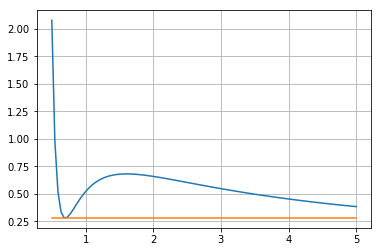

In [191]:
v = np.linspace(0.5, 5, 100)
plt.plot(v, p(v, 0.88))
y = 0.28*np.ones(100)
plt.plot(v, y) 
plt.grid()
plt.show()

In [192]:
t = 0.88
def comp_matrix(p, tau):
    return np.asarray([[0, 0, 1/p], [1, 0, -3/p], [0, 1,(8*tau+p)/(3*p)]])
def solve_eq(p, tau):
    eig_v =  np.linalg.eig(comp_matrix(p, tau))[0]
    return eig_v

In [193]:
#p = 0.28
print(solve_eq(0.28, t), np.roots(np.asarray([0.28, -(0.5+8*t)/3, 3, -1])))

[0.68337521 0.71428571 7.31662479] [7.63397297+0.j         0.67110875+0.13208549j 0.67110875-0.13208549j]


In [198]:
def integration(func, t, a, b, n):
    x = np.linspace(a, b, n)
    f = np.array(func(x, t))
    b = []
    for i in range(len(x)-1):
        b.append((f[i]+f[i+1])*(x[i+1] - x[i])/2)
    return(sum(np.array(b)))
print(integration(p, 0.88, 0.6, 1.5, 1000))
print((p(0.6, 0.88) + p(1.5, 0.88))/2)

0.4634609899892487
0.5723809523809523


In [202]:
def poisk(f, tau, a, b, n, tol):
    p_min = a
    p_max = b
    p0 = (p_min + p_max)/2
    while abs(p_max - p_min)/2 > tol:
        if integration(f, tau, a, b, n) > p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0]):
            p_max = p0
        elif integration(f, tau, a, b, n) < p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0]):
            p_min = p0
        elif integration(f, tau, a, b, n) == p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0]):
            p0 = p0
    return p0
def C(f, tau, a, b, n):
    p0 = (p(a, tau) + p(b, tau))/2
    return integration(f, tau, a, b, n) - p0*abs(solve_eq(p0, tau)[2] - solve_eq(p0, tau)[0])

p_int = np.linspace(0.25, 0.7, 100)
p0_int = []
#np.array(([(p_int[i] + p_int[i-1])/2 for i in range(1, len(p_int))]))
C_int = []
for i in range(1, len(p_int)):
    p0 = (p_int[i] + p_int[i-1])/2
    p0_int.append(p0)
    c = C(p, 0.88, p_int[i-1], p_int[i], 100)
    C_int.append(c)
print(C_int, p0_int, sep = '/n')

[34.70959038091769, 34.84802084874146, 35.298267392125965, 35.89452207157543, 36.64440747004134, 37.57541841636238, 38.72733266713234, 40.15549235488775, 41.93804235191769, 44.18855244052385, 47.07851317600778, 50.879872041510424, 56.0522205035862, 63.441812715782866, 74.80953572636243, 94.59099258136533, 138.72376255445727, 380.9030747886524, inf, -176.44924070738654, -80.55712638913052, -52.64697238653071, -38.90993628431924, -30.65935840968102, -25.13284479451034, -21.16371921539842, -18.171123821339403, -15.832410440473252, -13.953664895700829, -12.411168949131607, -11.122191728919633, -10.029267220154011, -9.091204306957298, -8.277686441708102, -7.565891383473925, -6.9383002784822425, -6.381234411898547, -5.883852156753363, -5.437445482191233, -5.034936468376916, -4.670510400062788, -4.3393440204404765, -4.037401297111398, -3.7612778745561566, -3.5080811625644435, -3.2753368645550474, -3.0609153682723487, -2.862973229342358, -2.679906245237556, -2.5103115174483324, -2.352956547459

C:\Users\digital\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
import sys

def f(x):
	return x**3 + x -1
	
def bisection(a,b,tol):
	c = (a+b)/2.0
	while (b-a)/2.0 > tol:
		if f(c) == 0:
			return c
		elif f(a)*f(c) < 0:
			b = c
		else :
			a = c
		c = (a+b)/2.0
		
	return c
	
def main(argv):
	if (len(sys.argv) != 4):
		sys.exit('Usage: bisection.py <a> <b> <tol>')
	
	print 'The root is: ',
	print bisection(int(sys.argv[1]),int(sys.argv[2]),float(sys.argv[3]))

if __name__ == "__main__":
	main(sys.argv[1:])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('The root is: ', end=" ")? (<ipython-input-203-a4387ecd4599>, line 23)